# Mask property - synthetic dataset SYN1

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
from matplotlib import axes
import os 
import pandas as pd
import json

import sys, os
sys.path.append('/cluster/home/kamara/Explain')
from clutils.nbutils import *
from clutils.nbutils.params import get_param_ranges
os.getcwd()
sns.set()

In [2]:
pal = sns.color_palette("Paired", 12)
dict_color = {"random":pal[0], "distance":pal[1], "pagerank":pal[2], "sa": pal[3], "ig": pal[4], "gradcam": pal[5], "occlusion":pal[6], 
              "basic_gnnexplainer": pal[7], "gnnexplainer": pal[8], 
              "pgmexplainer":pal[9], "subgraphx": pal[10], "pgexplainer": pal[11]}


In [3]:
sns.set_context("notebook", rc={"legend.fontsize":14, "legend.title_fontsize":14, 
                                "axes.titlesize":19,"axes.labelsize":17,
                               "xtick.labelsize" : 16, "ytick.labelsize" : 16})


In [4]:
dir = '/cluster/home/kamara/Explain/csv/node_classification/syn/topk'

jsonpath = f'/cluster/home/kamara/Explain/configs/syn/topk/config_syn_topk_cc.json'
ranges = get_param_ranges(jsonpath)

df_res = pd.read_csv(os.path.join(dir, f'nc_syn_topk_mask_properties.csv'), index_col = 0)
res = df_res.groupby(by=['dataset', 'topk', 'explainer_name', 'true_label_as_target', 'hard_mask']).mean()
res = res.reset_index()

In [5]:
def explainer_type(row):
    if row['explainer_name'] in ['basic_gnnexplainer', 'gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx', 'pgexplainer'] :
      return('pertubation')
    elif row['explainer_name'] in ['sa', 'ig', 'gradcam'] :
      return('gradient')
    return('baseline')

df_res['type'] = df_res.apply(lambda row: explainer_type(row), axis=1)

In [6]:
df_res["1-fidelity_acc-"] = 1- df_res["fidelity_acc-"]
df_res["1-fidelity_prob-"] = 1- df_res["fidelity_prob-"]
df_res['charact_prob'] = 2 * df_res['fidelity_prob+'] * (1-df_res['fidelity_prob-'])/ (df_res['fidelity_prob+']  + 1-df_res['fidelity_prob-'])
df_res['charact_acc'] = 2 * df_res['fidelity_acc+'] * (1-df_res['fidelity_acc-'])/ (df_res['fidelity_acc+']  + 1-df_res['fidelity_acc-'])


In [7]:
df_res["1-fidelity_gnn_acc-"] = 1- df_res["fidelity_gnn_acc-"]
df_res["1-fidelity_gnn_prob-"] = 1- df_res["fidelity_gnn_prob-"]
df_res['charact_gnn_prob'] = 2 * df_res['fidelity_gnn_prob+'] * (1-df_res['fidelity_gnn_prob-'])/ (df_res['fidelity_gnn_prob+']  + 1-df_res['fidelity_gnn_prob-'])
df_res['charact_gnn_acc'] = 2 * df_res['fidelity_gnn_acc+'] * (1-df_res['fidelity_gnn_acc-'])/ (df_res['fidelity_gnn_acc+']  + 1-df_res['fidelity_gnn_acc-'])


In [8]:
df_res = df_res.reset_index()
df_res

,dataset,true_label_as_target,hard_mask,topk,explainer_name,num_test,fidelity_acc+,fidelity_acc-,fidelity_prob+,fidelity_prob-,...,number_of_edges,type,1-fidelity_acc-,1-fidelity_prob-,charact_prob,charact_acc,1-fidelity_gnn_acc-,1-fidelity_gnn_prob-,charact_gnn_prob,charact_gnn_acc
0,syn1,True,True,1.0,basic_gnnexplainer,20.0,0.05,0.55,0.021082,0.434927,...,4110.0,pertubation,0.45,0.565073,0.040647,0.090000,2.0,2.0,-4.0,-4.0
1,syn1,True,True,1.0,distance,20.0,0.10,0.55,-0.024823,0.450872,...,4110.0,baseline,0.45,0.549128,-0.051996,0.163636,2.0,2.0,-4.0,-4.0
2,syn1,True,True,1.0,gnnexplainer,20.0,0.05,0.55,-0.004908,0.450872,...,4110.0,pertubation,0.45,0.549128,-0.009905,0.090000,2.0,2.0,-4.0,-4.0
3,syn1,True,True,1.0,ig,20.0,0.10,0.55,0.002297,0.459073,...,4110.0,gradient,0.45,0.540927,0.004576,0.163636,2.0,2.0,-4.0,-4.0
4,syn1,True,True,1.0,occlusion,20.0,0.45,0.55,0.326566,0.447400,...,4110.0,pertubation,0.45,0.552600,0.410526,0.450000,2.0,2.0,-4.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,syn1,True,True,100.0,pgexplainer,20.0,0.25,0.55,0.122988,0.409935,...,4110.0,pertubation,0.45,0.590065,0.203550,0.321429,2.0,2.0,-4.0,-4.0
161,syn1,True,True,100.0,pgmexplainer,20.0,0.45,0.15,0.363850,0.146160,...,4110.0,pertubation,0.85,0.853840,0.510261,0.588462,2.0,2.0,-4.0,-4.0
162,syn1,True,True,100.0,random,20.0,0.05,0.55,0.006008,0.450486,...,4110.0,baseline,0.45,0.549514,0.011887,0.090000,2.0,2.0,-4.0,-4.0
163,syn1,True,True,100.0,sa,20.0,0.55,0.55,0.354240,0.455535,...,4110.0,gradient,0.45,0.544465,0.429220,0.495000,2.0,2.0,-4.0,-4.0


In [9]:
df_res.columns

Index(['dataset', 'true_label_as_target', 'hard_mask', 'topk',
       'explainer_name', 'num_test', 'fidelity_acc+', 'fidelity_acc-',
       'fidelity_prob+', 'fidelity_prob-', 'fidelity_gnn_acc+',
       'fidelity_gnn_acc-', 'fidelity_gnn_prob+', 'fidelity_gnn_prob-',
       'f1_score', 'precision', 'recall', 'mask_size_init',
       'mask_entropy_init', 'max_avg_init', 'cc_ratio_init',
       'mask_size_transf', 'mask_entropy_transf', 'max_avg_transf',
       'cc_ratio_transf', 'time', 'number_of_edges', 'type', '1-fidelity_acc-',
       '1-fidelity_prob-', 'charact_prob', 'charact_acc',
       '1-fidelity_gnn_acc-', '1-fidelity_gnn_prob-', 'charact_gnn_prob',
       'charact_gnn_acc'],
      dtype='object')

## Mask Analysis: Avg on all topk

In [10]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype

def mean_str(col):
    if is_numeric_dtype(col):
        return col.mean()
    else:
        return col.unique() if col.nunique() == 1 else np.NaN

In [11]:
df_gen = df_res[["explainer_name", "mask_size_transf", "mask_entropy_transf", "max_avg_transf", 'cc_ratio_transf', "f1_score", "charact_acc", "type"]]
df_gen = df_gen.groupby(['explainer_name']).agg(mean_str)
df_gen

,mask_size_transf,mask_entropy_transf,max_avg_transf,cc_ratio_transf,f1_score,charact_acc,type
explainer_name,,,,,,,
basic_gnnexplainer,13.810000,1.887440,0.843117,0.302224,0.312224,0.287029,pertubation
distance,17.666667,2.083017,0.547668,0.176500,0.554585,0.387920,baseline
gnnexplainer,13.810000,1.837499,0.799837,0.300257,0.306077,0.313003,pertubation
ig,17.666667,2.154976,0.965828,0.290244,0.059057,0.163636,gradient
occlusion,17.666667,2.168502,0.940058,0.282591,0.135232,0.567600,pertubation
pagerank,17.666667,2.023475,0.620467,0.231109,0.595597,0.580279,baseline
pgexplainer,17.666667,2.169454,0.966529,0.500000,0.007536,0.084429,pertubation
pgmexplainer,16.426667,2.128565,0.838073,0.269278,0.419779,0.375388,pertubation
random,17.666667,2.169615,0.997201,0.476181,0.001992,0.006000,baseline


## Mask Analysis: Select topk/size

In [12]:
topk_val = 10

In [13]:
df_gen = df_res[df_res.topk==topk_val]
df_gen = df_gen[["explainer_name", "mask_size_transf", "mask_entropy_transf", "max_avg_transf", 'cc_ratio_transf', "charact_acc", "type"]]
df_gen = df_gen.groupby(['explainer_name']).agg(mean_str)
df_gen

,mask_size_transf,mask_entropy_transf,max_avg_transf,cc_ratio_transf,charact_acc,type
explainer_name,,,,,,
basic_gnnexplainer,10.0,2.168961,0.891730,0.289813,0.360000,pertubation
distance,10.0,2.203496,0.437362,0.143016,0.411765,baseline
gnnexplainer,10.0,2.130310,0.891120,0.277355,0.321429,pertubation
ig,10.0,2.301593,0.969894,0.258187,0.163636,gradient
occlusion,10.0,2.301072,0.930954,0.268040,0.576000,pertubation
pagerank,10.0,2.281524,0.601698,0.200000,0.682759,baseline
pgexplainer,10.0,2.302500,0.969486,0.500000,0.090000,pertubation
pgmexplainer,10.0,2.294032,0.809388,0.259802,0.400000,pertubation
random,10.0,2.302585,0.998540,0.485234,0.000000,baseline


## Plot property vs topk

In [14]:
df_gen = df_res[["explainer_name", "topk", "mask_size_transf", "mask_entropy_transf", "max_avg_transf", 'cc_ratio_transf', "f1_score", "charact_acc", "type"]]


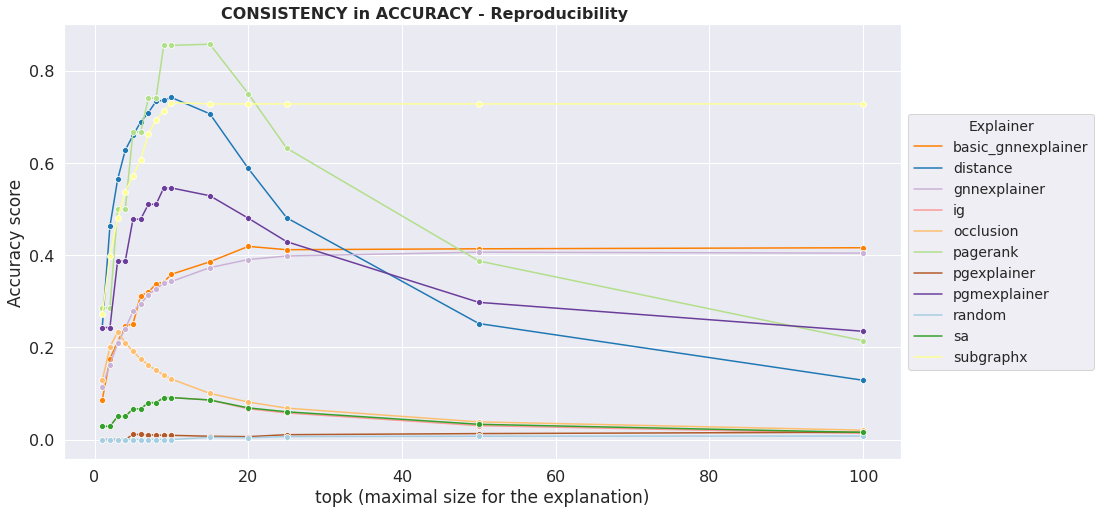

In [15]:
fig, ax = plt.subplots(figsize=(15,8))

g = sns.lineplot(data=df_gen, x="topk", y="f1_score",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)

plt.title('CONSISTENCY in ACCURACY - Reproducibility', fontsize=16, weight='bold', x=0.43)
# Put the legend out of the figure
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Explainer")

plt.xlabel("topk (maximal size for the explanation)")
plt.ylabel("Accuracy score")
plt.show()

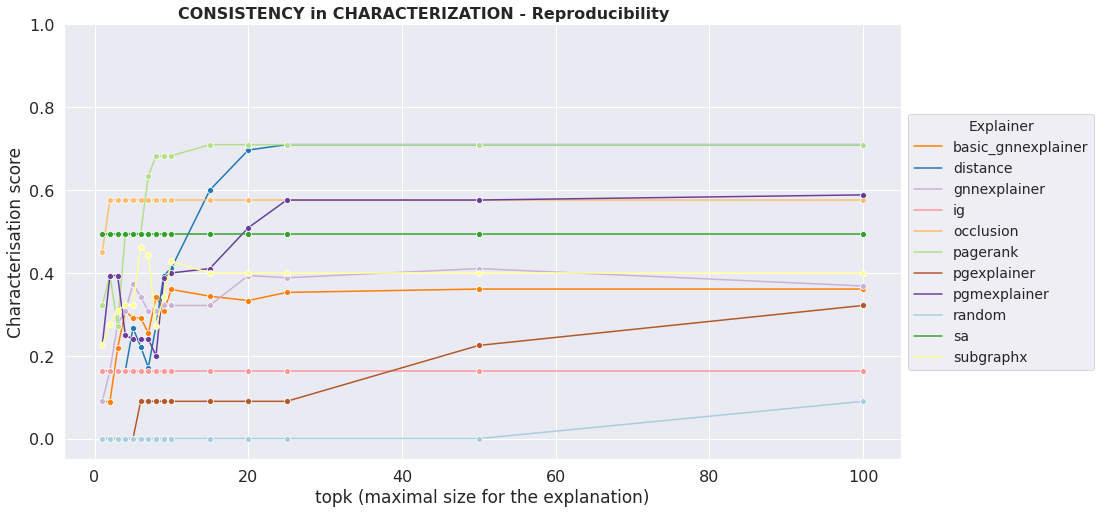

In [16]:
fig, ax = plt.subplots(figsize=(15,8))

g = sns.lineplot(data=df_gen, x="topk", y="charact_acc",
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)

plt.title('CONSISTENCY in CHARACTERIZATION - Reproducibility', fontsize=16, weight='bold', x=0.43)
# Put the legend out of the figure
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Explainer")

plt.ylim(-0.05,1)
plt.xlabel("topk (maximal size for the explanation)")
plt.ylabel("Characterisation score")
plt.show()

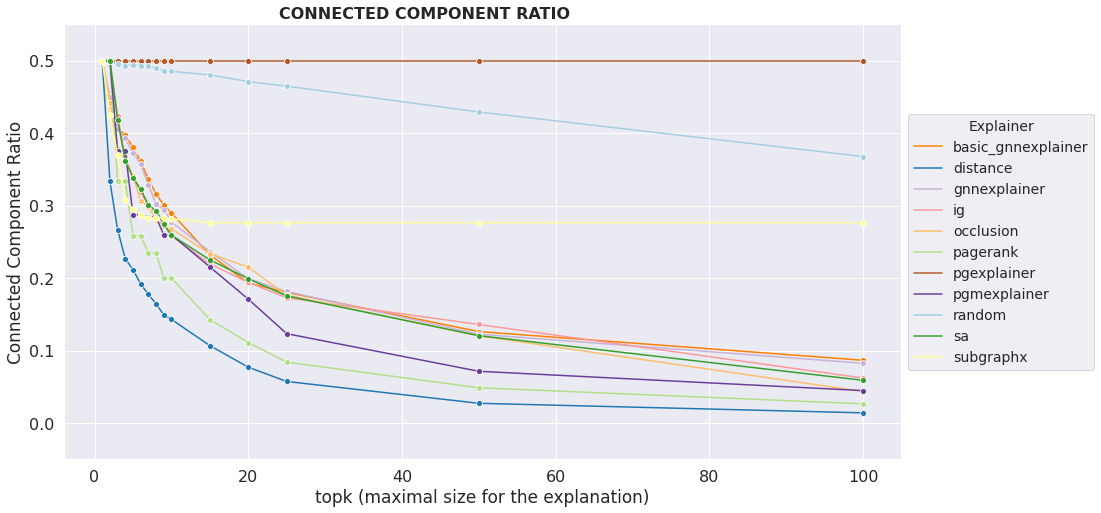

In [21]:
fig, ax = plt.subplots(figsize=(15,8))

g = sns.lineplot(data=df_gen, x="topk", y='cc_ratio_transf',
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)

plt.title('CONNECTED COMPONENT RATIO', fontsize=16, weight='bold', x=0.43)
# Put the legend out of the figure
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Explainer")

plt.ylim(-0.05,0.55)
plt.xlabel("topk (maximal size for the explanation)")
plt.ylabel("Connected Component Ratio")
plt.show()

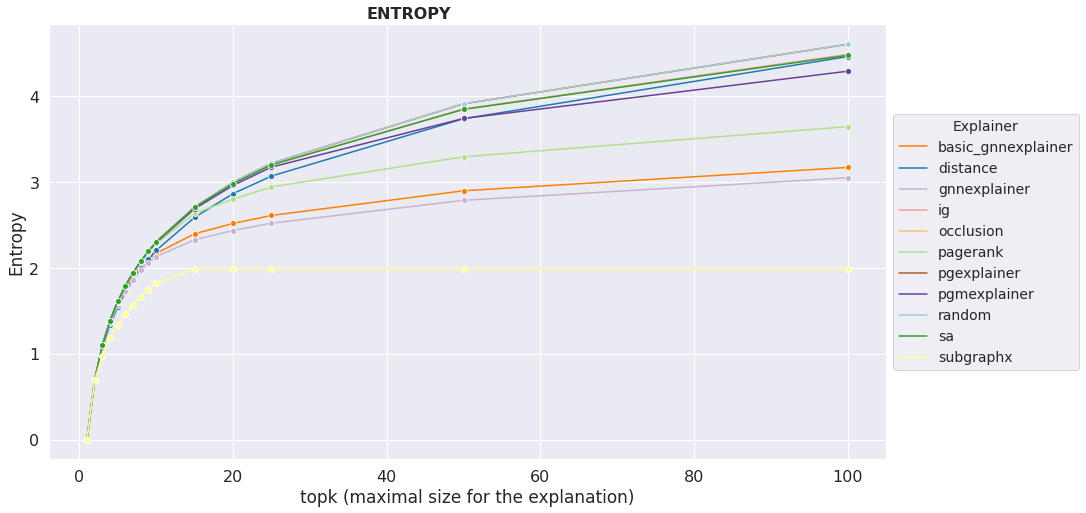

In [18]:
fig, ax = plt.subplots(figsize=(15,8))

g = sns.lineplot(data=df_gen, x="topk", y='mask_entropy_transf',
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)

plt.title('ENTROPY', fontsize=16, weight='bold', x=0.43)
# Put the legend out of the figure
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Explainer")

plt.xlabel("topk (maximal size for the explanation)")
plt.ylabel("Entropy")
plt.show()

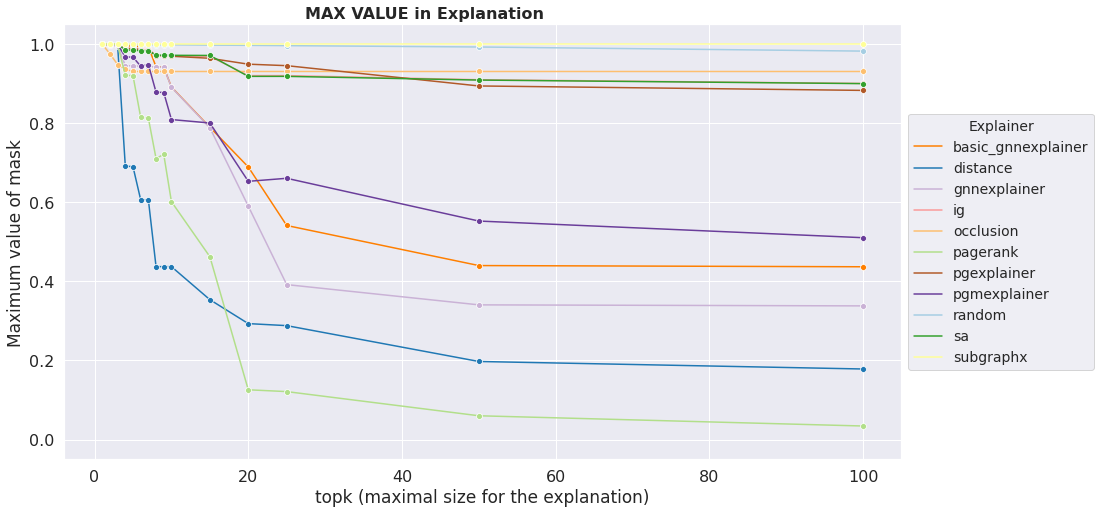

In [19]:
fig, ax = plt.subplots(figsize=(15,8))

g = sns.lineplot(data=df_gen, x="topk", y='max_avg_transf',
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)

plt.title('MAX VALUE in Explanation', fontsize=16, weight='bold', x=0.43)
# Put the legend out of the figure
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Explainer")

plt.ylim(-0.05,1.05)
plt.xlabel("topk (maximal size for the explanation)")
plt.ylabel("Maximum value of mask")
plt.show()

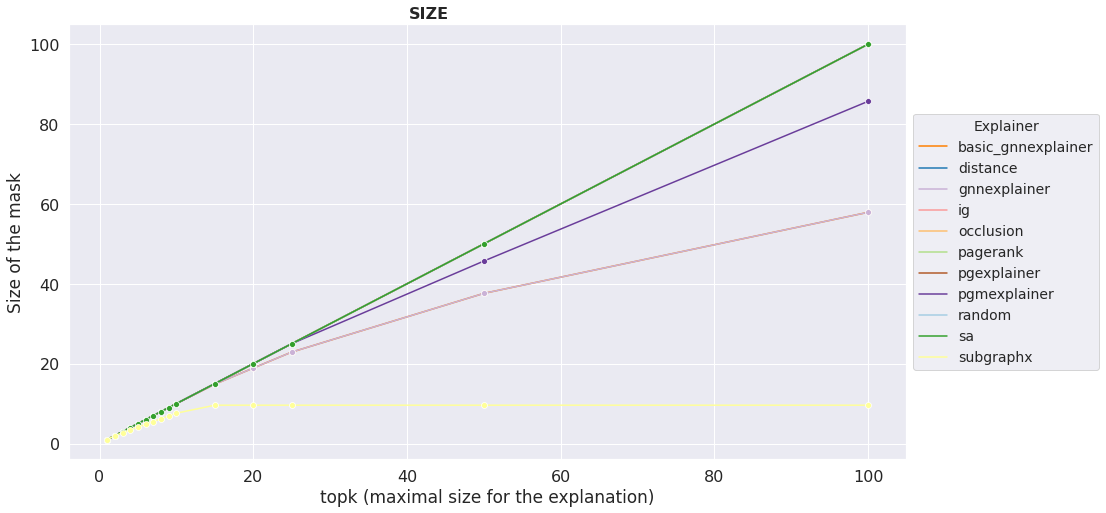

In [20]:
fig, ax = plt.subplots(figsize=(15,8))

g = sns.lineplot(data=df_gen, x="topk", y='mask_size_transf',
    hue="explainer_name", palette=dict_color, marker="o", ax=ax)

plt.title('SIZE', fontsize=16, weight='bold', x=0.43)
# Put the legend out of the figure
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Explainer")

#plt.ylim(-0.05,1.05)
plt.xlabel("topk (maximal size for the explanation)")
plt.ylabel("Size of the mask")
plt.show()

In [28]:
#df_gen_allk = df_res.groupby(["explainer_name", "mask_size_transf", "mask_entropy_transf", "max_avg_transf", 'cc_ratio_transf', "f1_score", "charact_acc"]).mean()
df_gen_allk = df_res.groupby(["explainer_name"]).mean()
df_gen_allk

,true_label_as_target,hard_mask,topk,num_test,fidelity_acc+,fidelity_acc-,fidelity_prob+,fidelity_prob-,fidelity_gnn_acc+,fidelity_gnn_acc-,...,time,number_of_edges,1-fidelity_acc-,1-fidelity_prob-,charact_prob,charact_acc,1-fidelity_gnn_acc-,1-fidelity_gnn_prob-,charact_gnn_prob,charact_gnn_acc
explainer_name,,,,,,,,,,,,,,,,,,,,,
basic_gnnexplainer,1.0,1.0,17.666667,20.0,0.220000,0.540000,0.129086,0.430108,-1.0,-1.0,...,3.2343,4110.0,0.460000,0.569892,0.205501,0.287029,2.0,2.0,-4.0,-4.0
distance,1.0,1.0,17.666667,20.0,0.310000,0.430000,0.205084,0.317482,-1.0,-1.0,...,0.0145,4110.0,0.570000,0.682518,0.281706,0.387920,2.0,2.0,-4.0,-4.0
gnnexplainer,1.0,1.0,17.666667,20.0,0.246667,0.530000,0.123155,0.434866,-1.0,-1.0,...,3.1841,4110.0,0.470000,0.565134,0.196498,0.313003,2.0,2.0,-4.0,-4.0
ig,1.0,1.0,17.666667,20.0,0.100000,0.550000,-0.011372,0.461753,-1.0,-1.0,...,0.1724,4110.0,0.450000,0.538247,-0.023363,0.163636,2.0,2.0,-4.0,-4.0
occlusion,1.0,1.0,17.666667,20.0,0.450000,0.223333,0.382032,0.125632,-1.0,-1.0,...,0.6812,4110.0,0.776667,0.874368,0.531177,0.567600,2.0,2.0,-4.0,-4.0
pagerank,1.0,1.0,17.666667,20.0,0.500000,0.270000,0.393877,0.170286,-1.0,-1.0,...,0.0287,4110.0,0.730000,0.829714,0.526731,0.580279,2.0,2.0,-4.0,-4.0
pgexplainer,1.0,1.0,17.666667,20.0,0.053333,0.550000,0.027474,0.441593,-1.0,-1.0,...,49.9946,4110.0,0.450000,0.558407,0.049126,0.084429,2.0,2.0,-4.0,-4.0
pgmexplainer,1.0,1.0,17.666667,20.0,0.330000,0.513333,0.235231,0.379204,-1.0,-1.0,...,3.1267,4110.0,0.486667,0.620796,0.338106,0.375388,2.0,2.0,-4.0,-4.0
random,1.0,1.0,17.666667,20.0,0.003333,0.550000,-0.003476,0.450846,-1.0,-1.0,...,0.0002,4110.0,0.450000,0.549154,-0.007108,0.006000,2.0,2.0,-4.0,-4.0


In [39]:
df_gen.columns

Index(['explainer_name', 'topk', 'mask_size_transf', 'mask_entropy_transf',
       'max_avg_transf', 'cc_ratio_transf', 'f1_score', 'charact_acc'],
      dtype='object')

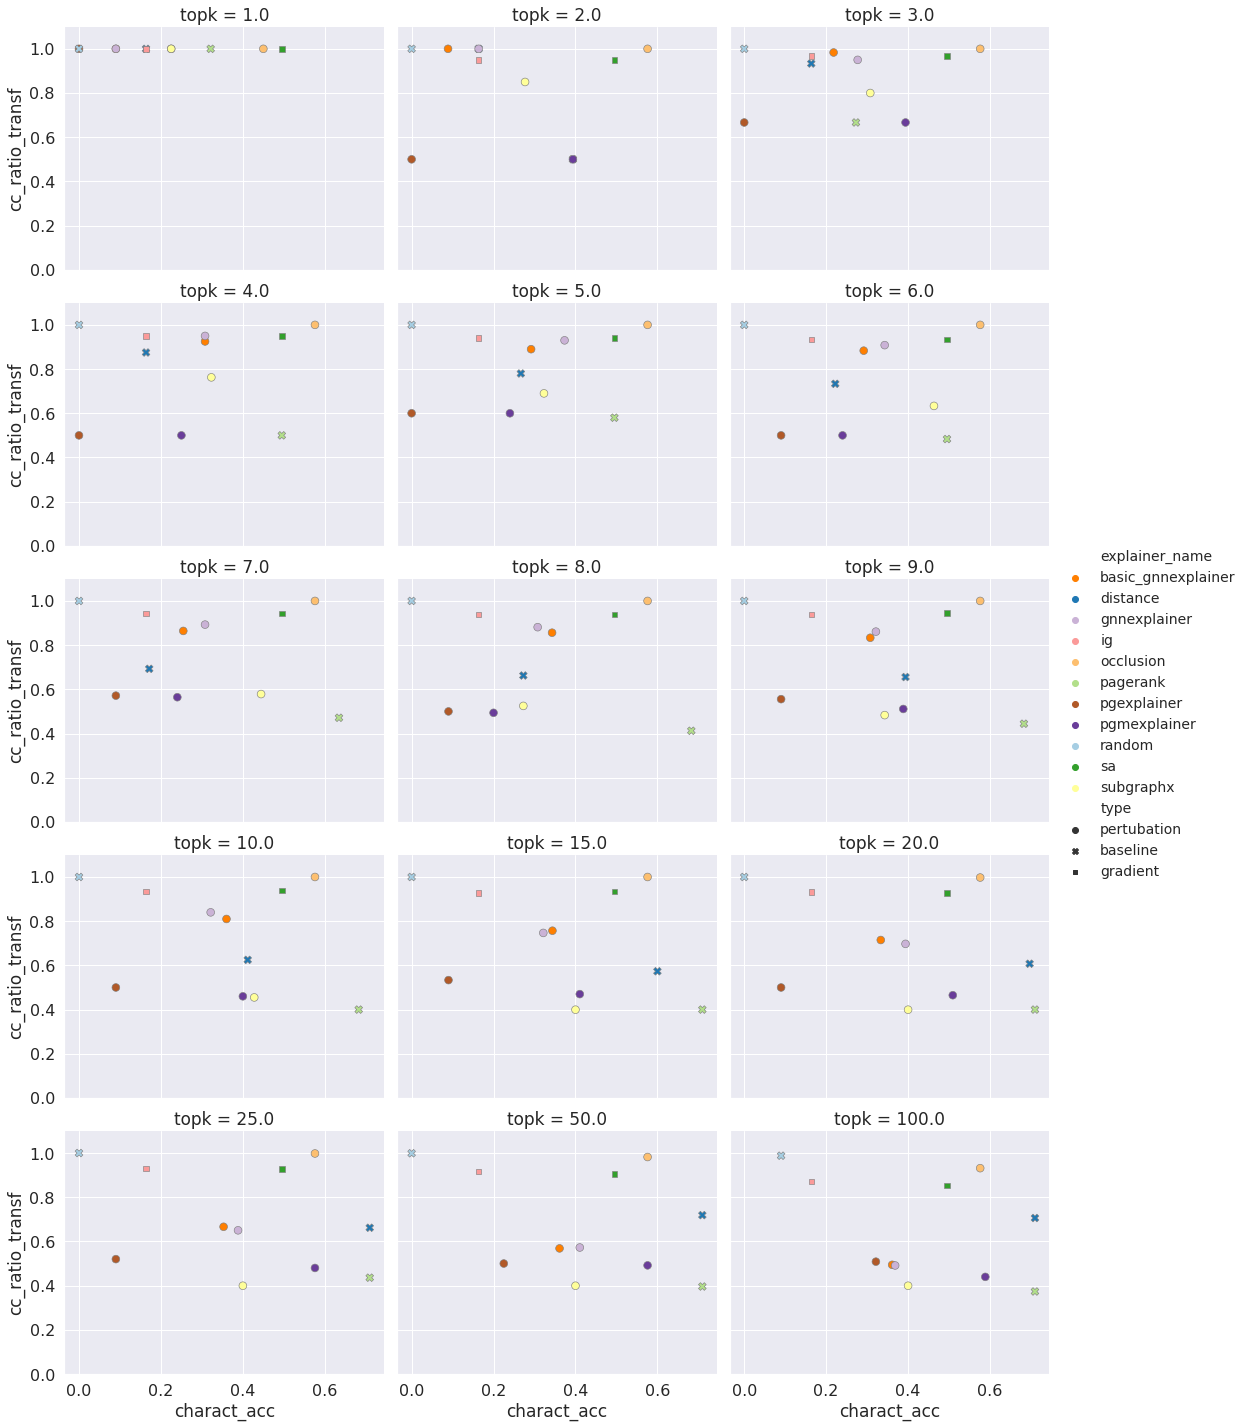

In [41]:
g = sns.FacetGrid(df_gen, col="topk", height=4, aspect=1.25, col_wrap=3)
g.map_dataframe(sns.scatterplot, x="charact_acc", y='cc_ratio_transf',
    hue="explainer_name", palette=dict_color, s=60, style="type", alpha =1, edgecolor="grey")
g.set(ylim=(0,1.1))
g.add_legend()

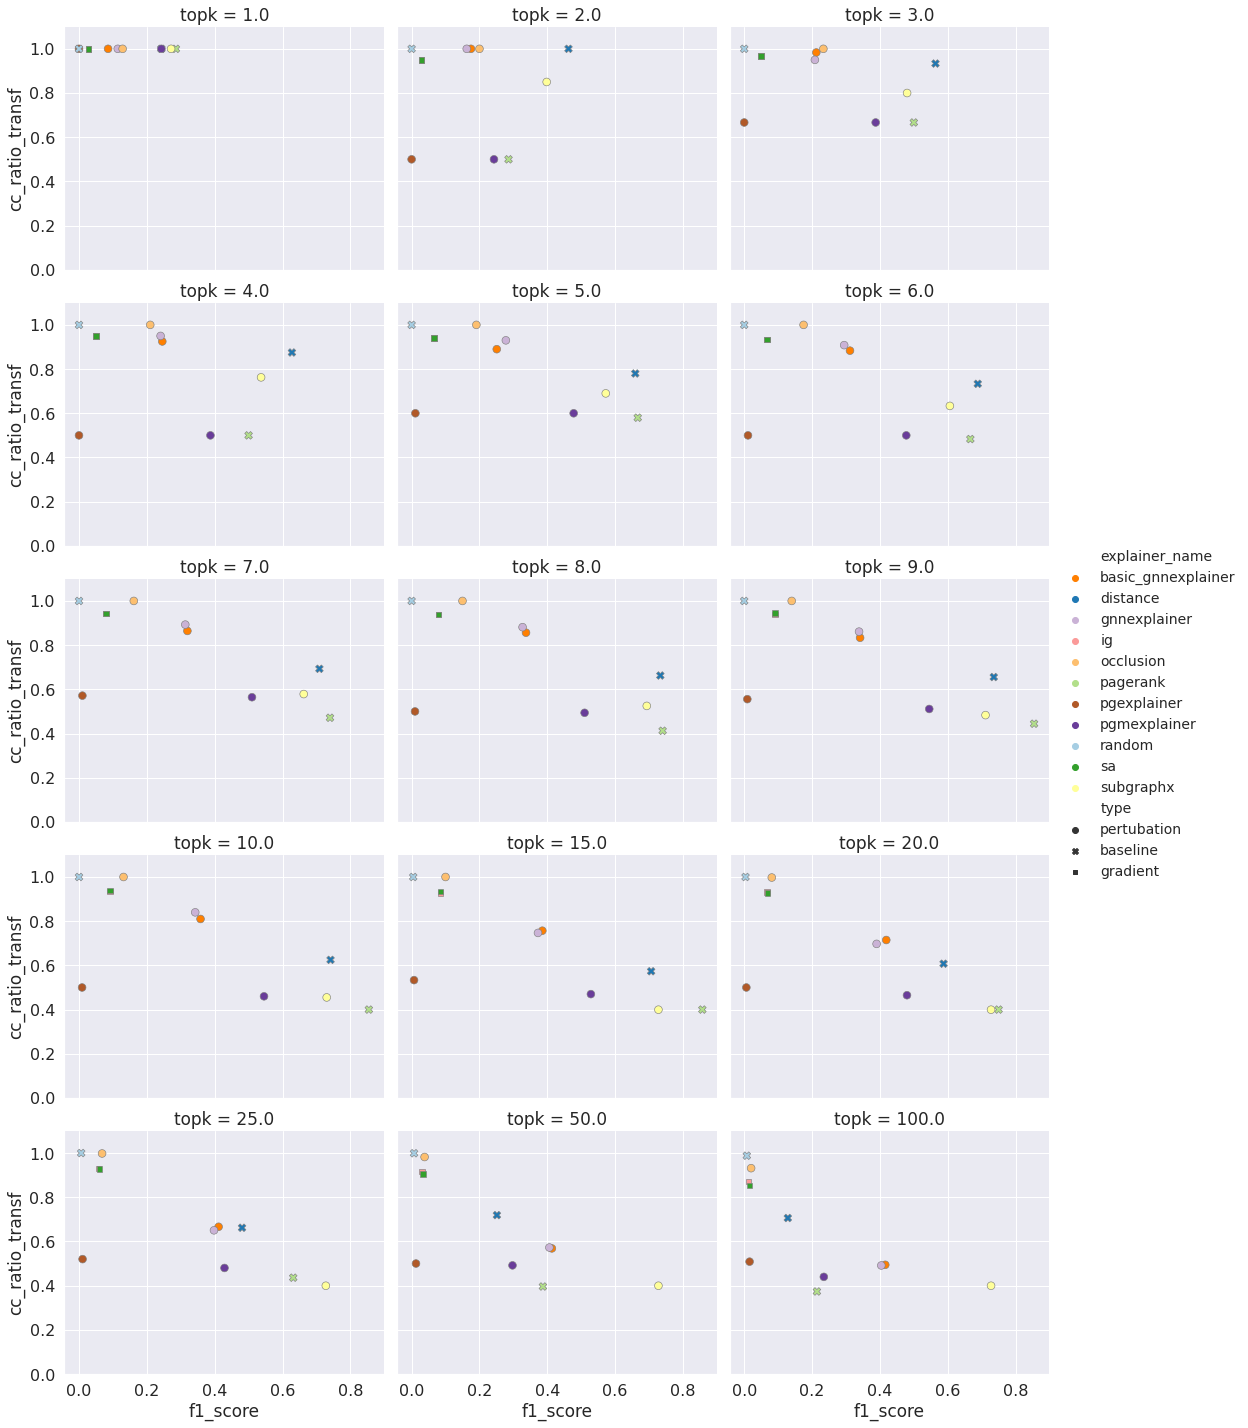

In [44]:
g = sns.FacetGrid(df_gen, col="topk", height=4, aspect=1.25, col_wrap=3)
g.map_dataframe(sns.scatterplot, x="f1_score", y='cc_ratio_transf',
    hue="explainer_name", palette=dict_color, s=60, style="type", alpha =1, edgecolor="grey")
g.set(ylim=(0,1.1))
g.add_legend()